# Sentimental Analysis - 2169204
# Group 3 for Element 012 assignment

# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import re
import nltk
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

#  Import the dataset

In [2]:
# Import the dataset
data = pd.read_csv('covid-19-labeled-data.csv')

# Check the first five entries of the dataset
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment
0,1.340540e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,4/8/2009 17:52,405,1692,3247,False,12/20/2020 6:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,NEU
1,1.338160e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",9/21/2009 15:27,834,666,178,False,12/13/2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,NEG
2,1.337860e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",6/25/2020 23:30,10,88,155,False,12/12/2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,NEU
3,1.337860e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",9/10/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,NEU
4,1.337850e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,4/23/2020 17:58,152,580,1473,False,12/12/2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,NEG


# Determine the shape of the dataset

In [3]:
data.shape

(3000, 17)

# Check the data types in each feature

In [4]:
data.dtypes

id                  float64
user_name            object
user_location        object
user_description     object
user_created         object
user_followers        int64
user_friends          int64
user_favourites       int64
user_verified          bool
date                 object
text                 object
hashtags             object
source               object
retweets              int64
favorites             int64
is_retweet             bool
sentiment            object
dtype: object

# Check the dataset for missing values

In [5]:
data.isnull().sum()

id                    0
user_name             0
user_location       631
user_description    178
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            769
source                1
retweets              0
favorites             0
is_retweet            0
sentiment             0
dtype: int64

# Remove duplicate rows in the dataset

In [6]:
duplicate_rows= data.drop_duplicates('text')
duplicate_rows.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment
0,1.340540e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,4/8/2009 17:52,405,1692,3247,False,12/20/2020 6:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,NEU
1,1.338160e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",9/21/2009 15:27,834,666,178,False,12/13/2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,NEG
2,1.337860e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",6/25/2020 23:30,10,88,155,False,12/12/2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,NEU
3,1.337860e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",9/10/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,NEU
4,1.337850e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,4/23/2020 17:58,152,580,1473,False,12/12/2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,NEG


# Display descriptive statistics of the dataset

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3000.0,1.342880e+18,3.316931e+15,1.337730e+18,1.339812e+18,1.342160e+18,1.346132e+18,1.350740e+18
user_followers,3000.0,5.619868e+04,4.392136e+05,0.000000e+00,1.160000e+02,5.810000e+02,2.568250e+03,1.371493e+07
user_friends,3000.0,1.190177e+03,2.476718e+03,0.000000e+00,1.650000e+02,4.595000e+02,1.227250e+03,6.444100e+04
user_favourites,3000.0,1.442830e+04,4.466940e+04,0.000000e+00,3.637500e+02,1.697000e+03,9.944000e+03,9.246670e+05
retweets,3000.0,1.681333e+00,1.185661e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.460000e+02
favorites,3000.0,1.130400e+01,7.597717e+01,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,2.129000e+03


# Handle missing values
> There are four columns with missing values. Only 'user_location' column will be filled as it is considered a significant feature. There is no need to fill or drop other columns with missing values since they are not selected as significant features.

In [8]:
# fill missing values in user_location column with 'no location'
data['user_location'].fillna('No Location', inplace=True)

# Check for missing values again
data.isnull().sum()

id                    0
user_name             0
user_location         0
user_description    178
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            769
source                1
retweets              0
favorites             0
is_retweet            0
sentiment             0
dtype: int64

# Check the number of tweets 
* Check the number of verified accounts tweeting about COVID-19
* Check the number of non-verified accounts tweeting about COVID-19

Number of tweets made by verified users: 396
Number of tweets made by non-verified users: 2604


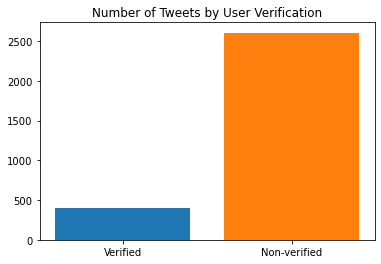

In [9]:
# Find the number of tweets made by verified and non-verified users about Covid19
verified_tweets = data.loc[data['user_verified'] == True, 'user_verified'].count()
non_verified_tweets = data.loc[data['user_verified'] == False, 'user_verified'].count()

print('Number of tweets made by verified users:', verified_tweets)
print('Number of tweets made by non-verified users:', non_verified_tweets)

# Plot a bar graph to represent these numbers
labels = ['Verified', 'Non-verified']
sizes = [verified_tweets, non_verified_tweets]
colors = ['#1f77b4', '#ff7f0e']

plt.bar(labels, sizes, color=colors)
plt.title('Number of Tweets by User Verification')
plt.show()

# Check the percentage of  tweets posted
> Display the percentage of tweets posted by verified  and non-verified users.

False    2604
True      396
Name: user_verified, dtype: int64


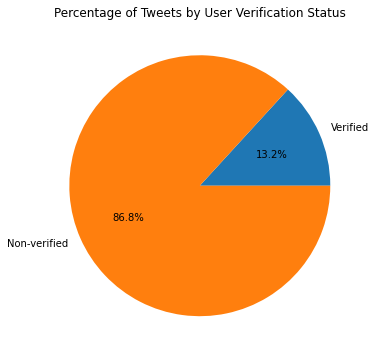

In [10]:
# Number of tweets posted by verified users
verified_counts = data['user_verified'].value_counts()
print(verified_counts)

# The total of tweets posted by verified and non-verified users
total_rows = data['user_verified'].count()

# Find the percentage of tweets posted by verified users
total_rows = data['user_verified'].count()
percentage_verified = (verified_counts[True] / total_rows) * 100
percentage_non_verified = 100 - percentage_verified

# Plot a pie chart to find the percentage of tweets posted by verified and non-verified users  
labels = ['Verified', 'Non-verified']
sizes = [percentage_verified, percentage_non_verified]
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(6,6)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of Tweets by User Verification Status')
plt.show()

# Check for top hashtags
> Display the top hashtags to know the trending topics being discussed.

                 Hashtag  Count
0        #PfizerBioNTech   1482
19              #COVID19    399
20              #vaccine    287
10         #CovidVaccine    230
45               #Pfizer    153
1           #coronavirus    107
4               #Moderna     96
43        #Pfizervaccine     82
60             #vaccines     70
7           #vaccination     62
308       #PfizerVaccine     55
3           #AstraZeneca     51
575               #Dubai     43
12       #COVID19Vaccine     42
128             #Covid19     40
5              #Covid_19     40
31                 #Iran     38
44   #PfizerCovidVaccine     35
18              #Vaccine     32
68             #BioNTech     29


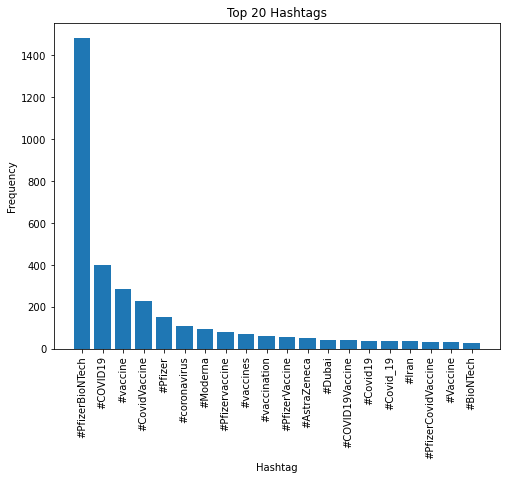

In [11]:
from collections import Counter

# Extract all hashtags from the tweets
hashtags = []
for tweet in data['text']:
    hashtags_in_tweet = re.findall(r'#\w+', tweet)
    hashtags.extend(hashtags_in_tweet)

# Count the frequency of each hashtag
hashtag_freq = Counter(hashtags)

# Create a DataFrame to store the hashtag frequency data
hashtags_df = pd.DataFrame(list(hashtag_freq.items()), columns=['Hashtag', 'Count'])

# Sort the DataFrame in descending order of frequency
hashtags_df = hashtags_df.sort_values(by='Count', ascending=False)

# Print the top 20 most common hashtags
print(hashtags_df.head(20))

# Plot the top 20 most common hashtags
plt.figure(figsize=(8, 6))
plt.bar(hashtags_df['Hashtag'][:20], hashtags_df['Count'][:20])
plt.xticks(rotation=90)
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.title('Top 20 Hashtags')
plt.show()

# Update the dataset
> This was done by selecting columns that are significant for sentiment analysis from the initial dataset. Columns which are deemed insignificant for this analysis have been eliminated by not selecting it. 

In [12]:
# Select significant columns
significant_columns = ['user_location', 'date', 'text', 'sentiment']
updated_data = data.loc[:, significant_columns]

# write the updated dataframe to a new CSV file
data.to_csv('updated_data.csv', index=False)

# Display the first five entries of these features
updated_data.head()

,user_location,date,text,sentiment
0,"La Crescenta-Montrose, CA",12/20/2020 6:06,Same folks said daikon paste could treat a cyt...,NEU
1,"San Francisco, CA",12/13/2020 16:27,While the world has been on the wrong side of ...,NEG
2,Your Bed,12/12/2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,NEU
3,"Vancouver, BC - Canada",12/12/2020 20:23,"Facts are immutable, Senator, even when you're...",NEU
4,No Location,12/12/2020 20:17,Explain to me again why we need a vaccine @Bor...,NEG


# Get the information on the updated dataset

In [13]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_location  3000 non-null   object
 1   date           3000 non-null   object
 2   text           3000 non-null   object
 3   sentiment      3000 non-null   object
dtypes: object(4)
memory usage: 93.9+ KB


# Split the date column
> As part of data preprocessing, split the date and time into different columns.

In [14]:
# Convert the 'date' column to datetime format
updated_data['date'] = pd.to_datetime(updated_data['date'])
updated_data['date'].head()

0   2020-12-20 06:06:00
1   2020-12-13 16:27:00
2   2020-12-12 20:33:00
3   2020-12-12 20:23:00
4   2020-12-12 20:17:00
Name: date, dtype: datetime64[ns]

In [15]:
# Extract the hour, minute, and date
updated_data['hour'] = updated_data['date'].dt.hour
updated_data['minute'] = updated_data['date'].dt.minute
updated_data['Date'] = updated_data['date'].dt.date

# Check the text column
> Display the elements or content of the text column (tweets).

In [16]:
# Display the text column (tweets)
text = updated_data['text']
text

0       Same folks said daikon paste could treat a cyt...
1       While the world has been on the wrong side of ...
2       #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3       Facts are immutable, Senator, even when you're...
4       Explain to me again why we need a vaccine @Bor...
                              ...                        
2995    Day 12 of having the vaccine. I can confirm. I...
2996    #Turks are very proud of them ,\n#CovidVaccine...
2997    #Dubai opens seventh clinic for Covid-19 #Pfiz...
2998    Buckle up buttercup, the second #PfizerBioNTec...
2999    So the plan is to add vaccination numbers for ...
Name: text, Length: 3000, dtype: object

# Perform data preprocessing
> Data preprocessing was carried out in accordance with the outline of solution from Element 012 Assignment.
> It includes the following highlighted steps: 

# Eliminate URLs from tweets
>  Remove website URLs hyperlinks, mentions or twitter handles, and hashtags from the elements or content of the text column. 

In [17]:
# Create a variable to define the lambda function to remove URLs, twitter handles, and hashtags
eliminate_url = lambda a: re.sub('http\S+|@\S+|#\S+','', str(a))

# Remove URLs, twitter handles, and hashtags in the text column using the lambda function created.
text_refined = text.apply(eliminate_url)
text_refined

0       Same folks said daikon paste could treat a cyt...
1       While the world has been on the wrong side of ...
2             Russian vaccine is created to last 2-4 y...
3       Facts are immutable, Senator, even when you're...
4          Explain to me again why we need a vaccine     
                              ...                        
2995    Day 12 of having the vaccine. I can confirm. I...
2996                         are very proud of them ,\n  
2997     opens seventh clinic for Covid-19  vaccine sh...
2998    Buckle up buttercup, the second  dose is a bea...
2999    So the plan is to add vaccination numbers for ...
Name: text, Length: 3000, dtype: object

# Check the frequency distribution of words
> Check the frequency distribution of words to identify the most commonly used words and phrases in the dataset.

In [18]:
import itertools
from nltk.probability import FreqDist

# Create a frequency distribution of words
fdist = FreqDist(text_refined)

# Print the top 20 most common words
print(fdist.most_common(15))

[(' Pfizer/BioNTech Coronavirus vaccine approved for emegency use by FDA!\nView the article to know more!… ', 19), ('\nKhamenei’s Red Crescent announced a ban on the import of 150,000   ', 19), ('. \n Khamenei’s ban on the purchase of    is a… ', 9), (' Death Toll Exceeds199,300\n. Red Crescent announced a ban on importing15… ', 7), (' Plans To Purchase 300-million More  Vaccines    ', 7), ('         ', 5), ("Trump announces  rollout 'in less than 24 hours'\n\nThe first Americans will be vaccinated against… ", 3), (' How you can book an appointment for the   in  Vaccine is available at six h… ', 3), ('    had NOTHING to do with ', 3), ('  Who can have the jab, and who can’t? Your questions answered ', 3), ('Oxford-AstraZeneca, Moderna, Pfizer-BioNTech, Novavax, Johnson &amp; Johnson: it is time to include kids ages 2-12 in v… ', 3), ('        ', 3), ('Covid-19 vaccination: What’s the evidence for extending the dosing interval? |   ', 3), ('      Russian vaccine is created to last 2-4 y

# Convert text to lowercases
> All English letters are converted to lowercases to reduce the size of the feature space, which can increase model performance.

In [19]:
# Create a lambda function to convert the content of the text column to lowercases
lowercase = lambda a: a.lower()

# Apply the lambda function to each text in the text column using map()
text_lc = text_refined.map(lowercase)
text_lc

0       same folks said daikon paste could treat a cyt...
1       while the world has been on the wrong side of ...
2             russian vaccine is created to last 2-4 y...
3       facts are immutable, senator, even when you're...
4          explain to me again why we need a vaccine     
                              ...                        
2995    day 12 of having the vaccine. i can confirm. i...
2996                         are very proud of them ,\n  
2997     opens seventh clinic for covid-19  vaccine sh...
2998    buckle up buttercup, the second  dose is a bea...
2999    so the plan is to add vaccination numbers for ...
Name: text, Length: 3000, dtype: object

# Eliminate punctuations
> All Punctuations and non-alphabetic characters are removed from the elements of the text column.

In [20]:
# Create a lambda function that will remove punctuation and non-alphabetic characters.
punc_removal = lambda x: re.sub('[^a-zA-Z]', ' ', x)

# Apply the lambda function to text_lc using apply()
remove_punc_and_non_alphabet= text_lc.apply(punc_removal)
remove_punc_and_non_alphabet

0       same folks said daikon paste could treat a cyt...
1       while the world has been on the wrong side of ...
2             russian vaccine is created to last     y...
3       facts are immutable  senator  even when you re...
4          explain to me again why we need a vaccine     
                              ...                        
2995    day    of having the vaccine  i can confirm  i...
2996                          are very proud of them     
2997     opens seventh clinic for covid     vaccine sh...
2998    buckle up buttercup  the second  dose is a bea...
2999    so the plan is to add vaccination numbers for ...
Name: text, Length: 3000, dtype: object

# Remove additional whitespaces
> Additional whitespaces generated from the removal of punctuaction and non-alphabetic characters are also removed.

In [21]:
# Define a lambda function to eliminate additional whitespaces
extra_space = lambda s: re.sub(r'\s+', ' ', s).strip()

# Apply the lambda function to the element of the text column to remove extra whitespaces
remove_extra_space = remove_punc_and_non_alphabet.apply(extra_space)
remove_extra_space

0       same folks said daikon paste could treat a cyt...
1       while the world has been on the wrong side of ...
2                russian vaccine is created to last years
3       facts are immutable senator even when you re n...
4               explain to me again why we need a vaccine
                              ...                        
2995    day of having the vaccine i can confirm i do n...
2996                               are very proud of them
2997         opens seventh clinic for covid vaccine shots
2998    buckle up buttercup the second dose is a bear ...
2999    so the plan is to add vaccination numbers for ...
Name: text, Length: 3000, dtype: object

# Perform tokenization on the text column
> Separate the content of the text column into individual words or tokens.

In [22]:
from nltk.tokenize import word_tokenize

# Tokenize the element of the text column using word_tokenize
tokenized_text = remove_extra_space.apply(lambda d: nltk.word_tokenize(d))
tokenized_text

0       [same, folks, said, daikon, paste, could, trea...
1       [while, the, world, has, been, on, the, wrong,...
2        [russian, vaccine, is, created, to, last, years]
3       [facts, are, immutable, senator, even, when, y...
4       [explain, to, me, again, why, we, need, a, vac...
                              ...                        
2995    [day, of, having, the, vaccine, i, can, confir...
2996                         [are, very, proud, of, them]
2997    [opens, seventh, clinic, for, covid, vaccine, ...
2998    [buckle, up, buttercup, the, second, dose, is,...
2999    [so, the, plan, is, to, add, vaccination, numb...
Name: text, Length: 3000, dtype: object

# Eliminate stop words
>Stop words are removed from the content of the text to eliminate low-level information and focus on the essential information.

In [23]:
from nltk.corpus import stopwords

# Create a set of English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from each tweet's tokenized text
stopwords_removed_text = tokenized_text.apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
stopwords_removed_text

0       [folks, said, daikon, paste, could, treat, cyt...
1       [world, wrong, side, history, year, hopefully,...
2                [russian, vaccine, created, last, years]
3       [facts, immutable, senator, even, ethically, s...
4                                [explain, need, vaccine]
                              ...                        
2995    [day, vaccine, confirm, ears, toes, better, phon]
2996                                              [proud]
2997      [opens, seventh, clinic, covid, vaccine, shots]
2998    [buckle, buttercup, second, dose, bear, misgiv...
2999    [plan, add, vaccination, numbers, every, count...
Name: text, Length: 3000, dtype: object

# Carry out stemming
> Stemming was carried out on the content of the text column to reduce words to their root forms. Stemming is done to reduce the size of the text and improve the efficiency of the model.

In [24]:
from nltk.stem import PorterStemmer

# Create a stemmer object
stemmer_object = PorterStemmer()

# Apply stemming to each token in the tokenized text using a list comprehension
stemmed_text = stopwords_removed_text.apply(lambda tokens: [stemmer_object.stem(token) for token in tokens])
stemmed_text

0       [folk, said, daikon, past, could, treat, cytok...
1       [world, wrong, side, histori, year, hope, bigg...
2                    [russian, vaccin, creat, last, year]
3       [fact, immut, senat, even, ethic, sturdi, enou...
4                                 [explain, need, vaccin]
                              ...                        
2995       [day, vaccin, confirm, ear, toe, better, phon]
2996                                              [proud]
2997         [open, seventh, clinic, covid, vaccin, shot]
2998    [buckl, buttercup, second, dose, bear, misgiv,...
2999    [plan, add, vaccin, number, everi, counti, us,...
Name: text, Length: 3000, dtype: object

# Carry out transformation
> This is done to merge the preprocessed columns with the updated_data.

In [25]:
# merge 'text_refined' into updated dataset
df = pd.concat([updated_data, text_refined.rename('refined text')], axis=1)

# merge 'text_lc into updated dataset
df = pd.concat([df, text_lc.rename('lowercase text')], axis=1)

# merge 'remove_punc_and_non_alpha' into updated dataset
df = pd.concat([df, remove_punc_and_non_alphabet.rename('non-punctuated text')], axis=1)

# merge 'remove_extra_space' into updated dataset
df = pd.concat([df, remove_extra_space.rename('non-extraspace text')], axis=1)

# merge 'tokenized_text' into updated dataset
df = pd.concat([df, tokenized_text.rename('tokenized text')], axis=1)

# merge 'text_lc' into updated dataset
df = pd.concat([df, stopwords_removed_text.rename('non-stopwords text')], axis=1)

# merge 'text_lc' into updated dataset
df = pd.concat([df, stemmed_text.rename('stemmed text')], axis=1)

# Save the merged DataFrame to a CSV file
df.to_csv('merged_data.csv', index=False)

# print the concatenated columns with the updated dataset
df.head()

,user_location,date,text,sentiment,hour,minute,Date,refined text,lowercase text,non-punctuated text,non-extraspace text,tokenized text,non-stopwords text,stemmed text
0,"La Crescenta-Montrose, CA",2020-12-20 06:06:00,Same folks said daikon paste could treat a cyt...,NEU,6,6,2020-12-20,Same folks said daikon paste could treat a cyt...,same folks said daikon paste could treat a cyt...,same folks said daikon paste could treat a cyt...,same folks said daikon paste could treat a cyt...,"[same, folks, said, daikon, paste, could, trea...","[folks, said, daikon, paste, could, treat, cyt...","[folk, said, daikon, past, could, treat, cytok..."
1,"San Francisco, CA",2020-12-13 16:27:00,While the world has been on the wrong side of ...,NEG,16,27,2020-12-13,While the world has been on the wrong side of ...,while the world has been on the wrong side of ...,while the world has been on the wrong side of ...,while the world has been on the wrong side of ...,"[while, the, world, has, been, on, the, wrong,...","[world, wrong, side, history, year, hopefully,...","[world, wrong, side, histori, year, hope, bigg..."
2,Your Bed,2020-12-12 20:33:00,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,NEU,20,33,2020-12-12,Russian vaccine is created to last 2-4 y...,russian vaccine is created to last 2-4 y...,russian vaccine is created to last y...,russian vaccine is created to last years,"[russian, vaccine, is, created, to, last, years]","[russian, vaccine, created, last, years]","[russian, vaccin, creat, last, year]"
3,"Vancouver, BC - Canada",2020-12-12 20:23:00,"Facts are immutable, Senator, even when you're...",NEU,20,23,2020-12-12,"Facts are immutable, Senator, even when you're...","facts are immutable, senator, even when you're...",facts are immutable senator even when you re...,facts are immutable senator even when you re n...,"[facts, are, immutable, senator, even, when, y...","[facts, immutable, senator, even, ethically, s...","[fact, immut, senat, even, ethic, sturdi, enou..."
4,No Location,2020-12-12 20:17:00,Explain to me again why we need a vaccine @Bor...,NEG,20,17,2020-12-12,Explain to me again why we need a vaccine,explain to me again why we need a vaccine,explain to me again why we need a vaccine,explain to me again why we need a vaccine,"[explain, to, me, again, why, we, need, a, vac...","[explain, need, vaccine]","[explain, need, vaccin]"


# Create a clean text column
> Convert the stemmed text, which is a list, to a string for further analysis.

In [26]:
# Convert 'stemmed text' to a string. This will be our clean text
df['cleaned text'] = df['stemmed text'].apply(lambda x: ' '.join(x))
df['cleaned text']

0         folk said daikon past could treat cytokin storm
1       world wrong side histori year hope biggest vac...
2                          russian vaccin creat last year
3       fact immut senat even ethic sturdi enough ackn...
4                                     explain need vaccin
                              ...                        
2995               day vaccin confirm ear toe better phon
2996                                                proud
2997                open seventh clinic covid vaccin shot
2998    buckl buttercup second dose bear misgiv mild s...
2999    plan add vaccin number everi counti us manag g...
Name: cleaned text, Length: 3000, dtype: object

# Perform sentiment analysis 
> Carry out sentiment analysis on the preprocessed text using a lexicon and rule based approach known as **VADER**. It returns sentiments scores for each text as positive, negative, or neutral sentiment. It also returns an overall compound score for the overall sentiment of the text.

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Launch the analyzer
analyzer = SentimentIntensityAnalyzer()

# Create a list to store the sentiment scores of each tweet
sentiment_scores = []

# Analyze the sentiment of each tweet and store the score in sentiment_scores list
for tweet in stemmed_text:
    tweet_str = ' '.join(tweet) # join the stemmed words into a single string
    sentiment_scores.append(analyzer.polarity_scores(tweet_str))

# Change the sentiment_scores list to a DataFrame
df_sentiment_scores = pd.DataFrame(sentiment_scores)

# Merge the sentiment_scores DataFrame with the updated dataset
df = pd.concat([df.reset_index(drop=True), df_sentiment_scores], axis=1)
df.head()

,user_location,date,text,sentiment,hour,minute,Date,refined text,lowercase text,non-punctuated text,non-extraspace text,tokenized text,non-stopwords text,stemmed text,cleaned text,neg,neu,pos,compound
0,"La Crescenta-Montrose, CA",2020-12-20 06:06:00,Same folks said daikon paste could treat a cyt...,NEU,6,6,2020-12-20,Same folks said daikon paste could treat a cyt...,same folks said daikon paste could treat a cyt...,same folks said daikon paste could treat a cyt...,same folks said daikon paste could treat a cyt...,"[same, folks, said, daikon, paste, could, trea...","[folks, said, daikon, paste, could, treat, cyt...","[folk, said, daikon, past, could, treat, cytok...",folk said daikon past could treat cytokin storm,0.000,0.722,0.278,0.4019
1,"San Francisco, CA",2020-12-13 16:27:00,While the world has been on the wrong side of ...,NEG,16,27,2020-12-13,While the world has been on the wrong side of ...,while the world has been on the wrong side of ...,while the world has been on the wrong side of ...,while the world has been on the wrong side of ...,"[while, the, world, has, been, on, the, wrong,...","[world, wrong, side, history, year, hopefully,...","[world, wrong, side, histori, year, hope, bigg...",world wrong side histori year hope biggest vac...,0.221,0.571,0.207,-0.0516
2,Your Bed,2020-12-12 20:33:00,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,NEU,20,33,2020-12-12,Russian vaccine is created to last 2-4 y...,russian vaccine is created to last 2-4 y...,russian vaccine is created to last y...,russian vaccine is created to last years,"[russian, vaccine, is, created, to, last, years]","[russian, vaccine, created, last, years]","[russian, vaccin, creat, last, year]",russian vaccin creat last year,0.000,1.000,0.000,0.0000
3,"Vancouver, BC - Canada",2020-12-12 20:23:00,"Facts are immutable, Senator, even when you're...",NEU,20,23,2020-12-12,"Facts are immutable, Senator, even when you're...","facts are immutable, senator, even when you're...",facts are immutable senator even when you re...,facts are immutable senator even when you re n...,"[facts, are, immutable, senator, even, when, y...","[facts, immutable, senator, even, ethically, s...","[fact, immut, senat, even, ethic, sturdi, enou...",fact immut senat even ethic sturdi enough ackn...,0.000,1.000,0.000,0.0000
4,No Location,2020-12-12 20:17:00,Explain to me again why we need a vaccine @Bor...,NEG,20,17,2020-12-12,Explain to me again why we need a vaccine,explain to me again why we need a vaccine,explain to me again why we need a vaccine,explain to me again why we need a vaccine,"[explain, to, me, again, why, we, need, a, vac...","[explain, need, vaccine]","[explain, need, vaccin]",explain need vaccin,0.000,1.000,0.000,0.0000


# Perform manual label 
> Label the polarity of the compound score manually.

In [28]:
# define function to classify the sentiment based on compound score
def obtain_sentiment(compound):
    if compound > 0:
        return 'positive'
    elif compound < 0:
        return 'negative'
    else:
        return 'neutral'

# apply sentiment analyzer and add sentiment label to dataframe
df['vader_sentiment_label'] = df['compound'].apply(obtain_sentiment)
df.head()

,user_location,date,text,sentiment,hour,minute,Date,refined text,lowercase text,non-punctuated text,non-extraspace text,tokenized text,non-stopwords text,stemmed text,cleaned text,neg,neu,pos,compound,vader_sentiment_label
0,"La Crescenta-Montrose, CA",2020-12-20 06:06:00,Same folks said daikon paste could treat a cyt...,NEU,6,6,2020-12-20,Same folks said daikon paste could treat a cyt...,same folks said daikon paste could treat a cyt...,same folks said daikon paste could treat a cyt...,same folks said daikon paste could treat a cyt...,"[same, folks, said, daikon, paste, could, trea...","[folks, said, daikon, paste, could, treat, cyt...","[folk, said, daikon, past, could, treat, cytok...",folk said daikon past could treat cytokin storm,0.000,0.722,0.278,0.4019,positive
1,"San Francisco, CA",2020-12-13 16:27:00,While the world has been on the wrong side of ...,NEG,16,27,2020-12-13,While the world has been on the wrong side of ...,while the world has been on the wrong side of ...,while the world has been on the wrong side of ...,while the world has been on the wrong side of ...,"[while, the, world, has, been, on, the, wrong,...","[world, wrong, side, history, year, hopefully,...","[world, wrong, side, histori, year, hope, bigg...",world wrong side histori year hope biggest vac...,0.221,0.571,0.207,-0.0516,negative
2,Your Bed,2020-12-12 20:33:00,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,NEU,20,33,2020-12-12,Russian vaccine is created to last 2-4 y...,russian vaccine is created to last 2-4 y...,russian vaccine is created to last y...,russian vaccine is created to last years,"[russian, vaccine, is, created, to, last, years]","[russian, vaccine, created, last, years]","[russian, vaccin, creat, last, year]",russian vaccin creat last year,0.000,1.000,0.000,0.0000,neutral
3,"Vancouver, BC - Canada",2020-12-12 20:23:00,"Facts are immutable, Senator, even when you're...",NEU,20,23,2020-12-12,"Facts are immutable, Senator, even when you're...","facts are immutable, senator, even when you're...",facts are immutable senator even when you re...,facts are immutable senator even when you re n...,"[facts, are, immutable, senator, even, when, y...","[facts, immutable, senator, even, ethically, s...","[fact, immut, senat, even, ethic, sturdi, enou...",fact immut senat even ethic sturdi enough ackn...,0.000,1.000,0.000,0.0000,neutral
4,No Location,2020-12-12 20:17:00,Explain to me again why we need a vaccine @Bor...,NEG,20,17,2020-12-12,Explain to me again why we need a vaccine,explain to me again why we need a vaccine,explain to me again why we need a vaccine,explain to me again why we need a vaccine,"[explain, to, me, again, why, we, need, a, vac...","[explain, need, vaccine]","[explain, need, vaccin]",explain need vaccin,0.000,1.000,0.000,0.0000,neutral


# Display the word cloud plot 
> Plot a wordcloud from the cleaned text to show the most commonly used words in positive, neutral, and negative tweets. 

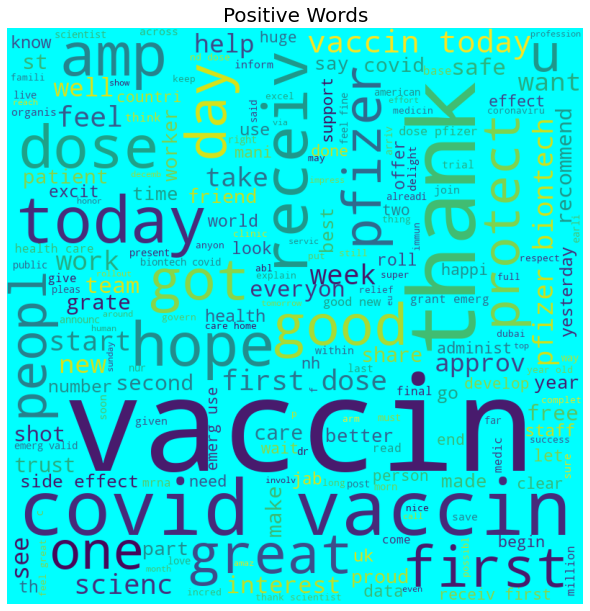

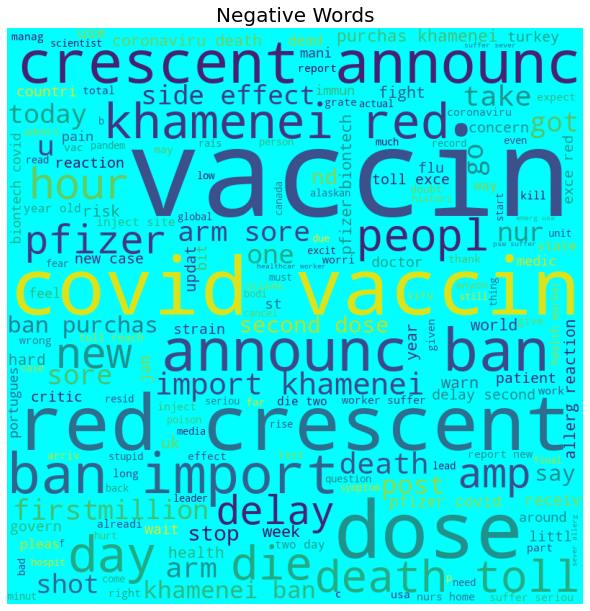

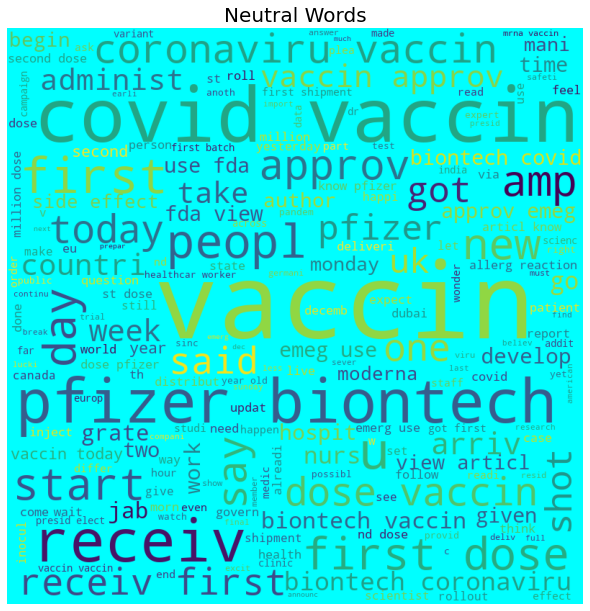

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create separate dataframes for each sentiment label
pos_df = df[df['vader_sentiment_label'] == 'positive']
neg_df = df[df['vader_sentiment_label'] == 'negative']
neu_df = df[df['vader_sentiment_label'] == 'neutral']

# Create a function to generate a word cloud
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=800,
                          background_color='cyan',
                          min_font_size=10).generate(' '.join(data))
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title, fontsize=20)
    plt.show()

# Generate word clouds for each sentiment label
generate_wordcloud(pos_df['cleaned text'], 'Positive Words')
generate_wordcloud(neg_df['cleaned text'], 'Negative Words')
generate_wordcloud(neu_df['cleaned text'], 'Neutral Words')

# Perform sentiment analysis 
> Carry out sentiment analysis on the same preprocessed text using a hybrid technique (rule-based and machine learning approach) known as **TextBlob**. It returns sentiments scores as textblob_score for each text and label it as positive, negative, or neutral sentiment.

In [30]:
from textblob import TextBlob

# Define a function to get the sentiment polarity of each tweet
def obtain_sentiment_polarity(text):
    """
    Get the sentiment polarity of a given text using TextBlob.
    
    :param text: A string of cleaned text
    :return: A float indicating the sentiment polarity score (-1.0 to 1.0)
    """
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to each text in the stemmed_text column
df['textblob_score'] = df['cleaned text'].apply(lambda x: TextBlob(x).sentiment.polarity)

#df['textblob_score'] = stemmed_text.apply(lambda text: obtain_sentiment_polarity(' '.join(text)))

# Map the textblob score to a sentiment polarity label (positive, negative, neutral)
df['textblob_sentiment_label'] = df['textblob_score'].apply(lambda score: 
                    'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))
df.head()

,user_location,date,text,sentiment,hour,minute,Date,refined text,lowercase text,non-punctuated text,...,non-stopwords text,stemmed text,cleaned text,neg,neu,pos,compound,vader_sentiment_label,textblob_score,textblob_sentiment_label
0,"La Crescenta-Montrose, CA",2020-12-20 06:06:00,Same folks said daikon paste could treat a cyt...,NEU,6,6,2020-12-20,Same folks said daikon paste could treat a cyt...,same folks said daikon paste could treat a cyt...,same folks said daikon paste could treat a cyt...,...,"[folks, said, daikon, paste, could, treat, cyt...","[folk, said, daikon, past, could, treat, cytok...",folk said daikon past could treat cytokin storm,0.000,0.722,0.278,0.4019,positive,-0.25,negative
1,"San Francisco, CA",2020-12-13 16:27:00,While the world has been on the wrong side of ...,NEG,16,27,2020-12-13,While the world has been on the wrong side of ...,while the world has been on the wrong side of ...,while the world has been on the wrong side of ...,...,"[world, wrong, side, history, year, hopefully,...","[world, wrong, side, histori, year, hope, bigg...",world wrong side histori year hope biggest vac...,0.221,0.571,0.207,-0.0516,negative,-0.50,negative
2,Your Bed,2020-12-12 20:33:00,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,NEU,20,33,2020-12-12,Russian vaccine is created to last 2-4 y...,russian vaccine is created to last 2-4 y...,russian vaccine is created to last y...,...,"[russian, vaccine, created, last, years]","[russian, vaccin, creat, last, year]",russian vaccin creat last year,0.000,1.000,0.000,0.0000,neutral,0.00,neutral
3,"Vancouver, BC - Canada",2020-12-12 20:23:00,"Facts are immutable, Senator, even when you're...",NEU,20,23,2020-12-12,"Facts are immutable, Senator, even when you're...","facts are immutable, senator, even when you're...",facts are immutable senator even when you re...,...,"[facts, immutable, senator, even, ethically, s...","[fact, immut, senat, even, ethic, sturdi, enou...",fact immut senat even ethic sturdi enough ackn...,0.000,1.000,0.000,0.0000,neutral,0.00,neutral
4,No Location,2020-12-12 20:17:00,Explain to me again why we need a vaccine @Bor...,NEG,20,17,2020-12-12,Explain to me again why we need a vaccine,explain to me again why we need a vaccine,explain to me again why we need a vaccine,...,"[explain, need, vaccine]","[explain, need, vaccin]",explain need vaccin,0.000,1.000,0.000,0.0000,neutral,0.00,neutral


# Analyse the scores of Vader and Textblob

VADER Sentiment Score:
neutral     1670
positive     922
negative     408
Name: vader_sentiment_label, dtype: int64

TextBlob Sentiment Score:
neutral     1812
positive     945
negative     243
Name: textblob_sentiment_label, dtype: int64


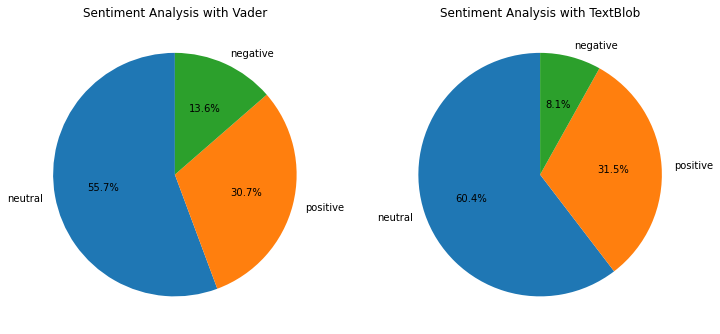

In [31]:
# Display the number of sentiment labels for Vader and TextBlob
vader_counts = df['vader_sentiment_label'].value_counts()
textblob_counts = df['textblob_sentiment_label'].value_counts()

print('VADER Sentiment Score:')
print(vader_counts)
print('\nTextBlob Sentiment Score:')
print(textblob_counts)

# Plot the number of positive, negative, and neutral tweets for Vader
# Create one figure with two subplots

fig, axs = plt.subplots(1, 2, figsize=(12,6))  
axs[0].pie(vader_counts, labels=vader_counts.index, startangle=90, autopct='%1.1f%%')
axs[0].set_title('Sentiment Analysis with Vader')

# Plot the number of positive, negative, and neutral tweets for TextBlob
axs[1].pie(textblob_counts, labels=textblob_counts.index, startangle=90, autopct='%1.1f%%')
axs[1].set_title('Sentiment Analysis with TextBlob')

plt.show()

# Display scores distribution
> Display the distribution of Vader and TextBlob Scores.

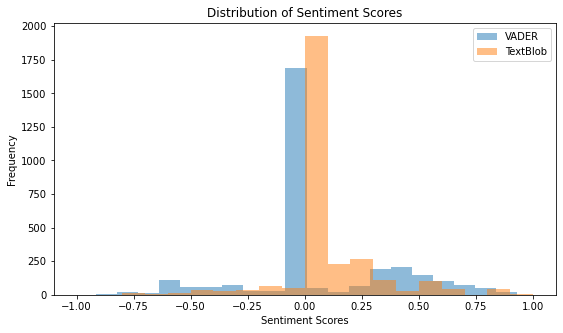

In [32]:
# Set a figure size for the plot
plt.figure(figsize=(9, 5))

# Plot histograms for VADER and TextBlob sentiment scores
plt.hist(df['compound'], bins=20, alpha=0.5, label='VADER')
plt.hist(df['textblob_score'], bins=20, alpha=0.5, label='TextBlob')

# Style the plot
plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.legend(loc='upper right')
plt.show()

# Compare 'user_location' with 'sentiment'
> Check the distribution of actual sentiment labels ('sentiment') for each unique value of 'user_location'.

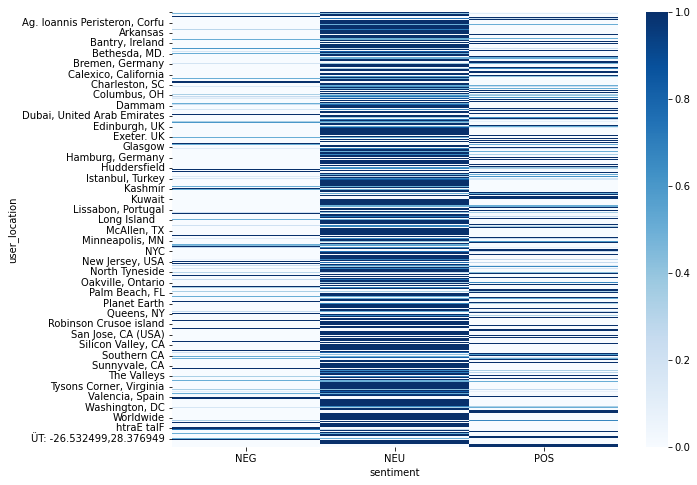

In [33]:
# create a crosstabulation table between 'user_location' and 'sentiment'
crosstab = pd.crosstab(df['user_location'], df['sentiment'], normalize='index')

# Visualise the crosstabulation table
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, cmap='Blues');

# Check the frequency of 'user_location' 
> Check the frequency of user_location to determine the most common locations among users.

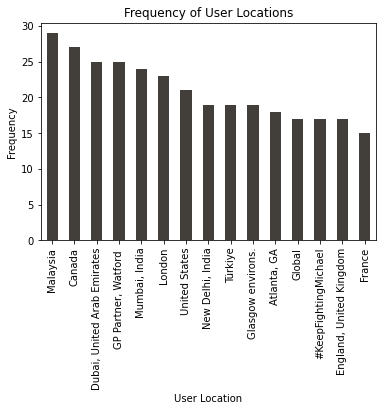

In [34]:
# count the frequency of each user_location
location_counts = df['user_location'].value_counts()

# create a bar chart of the location frequency counts
location_counts[6:21].plot(kind='bar', color='#423F3B')

# add chart title and axis labels
plt.title('Frequency of User Locations')
plt.xlabel('User Location')
plt.ylabel('Frequency')

# display the chart
plt.show()

# Perform time series analysis
> Perform time series analysis on the actual sentiment to check how people's sentiments evolved over time.

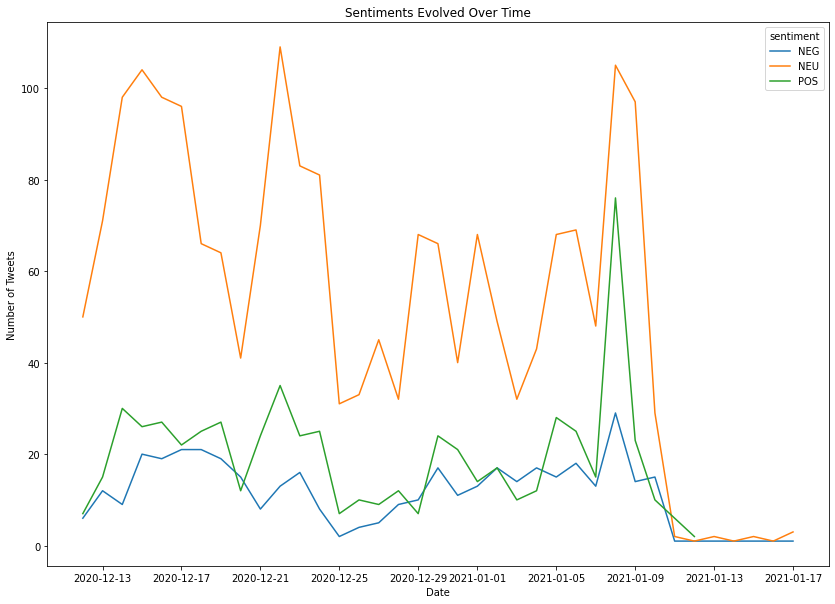

In [35]:
# Group the data by date and sentiment, and count the number of occurrences
sentiment_counts = updated_data.groupby(['Date', 'sentiment']).count().reset_index()

# Plot the time series for each sentiment
plt.figure(figsize=(14,10))
sns.lineplot(x='Date', y='text', hue='sentiment', data=sentiment_counts)
plt.title('Sentiments Evolved Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

# Perform sentiment analysis
> Perform sentiment analysis using machine learning approach.

# Perform feature selection

* Feature selection is carried out using **Bag of Words** Method
* X is the feature, which is the cleaned text
* y is the label, which is the actual sentiment
* Label encoding is done to convert the cagetorical forms in 'sentiment' to numerical forms.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Define features and label
X = df['cleaned text']
y = df['sentiment']

# Create a LabelEncoder object
le = LabelEncoder()

# create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the text data to create the feature matrix
X = vectorizer.fit_transform(X)

# Fit the encoder to the 'sentiment' column and transform the values to numerical labels
y = le.fit_transform(y)

# print the feature matrix shape
print(X.shape)

(3000, 3709)


# Train different machine learning algorithms
> According to the literature research done, the most common machine learning algorithms used for sentiment analysis are:

* Logistic Regression
* Naive Bayes
* Support Vector Machines (SVM)
* Random Forest
* Neural Networks

# Logistic Regression

Accuracy Score: 0.7933333333333333
Precision Score: 0.7870196077286791


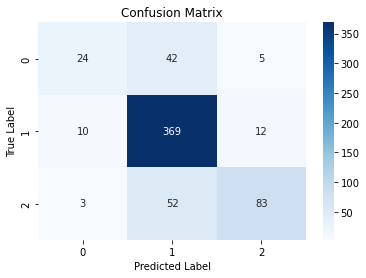

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression object
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the testing data
lr_preds = lr.predict(X_test)

# Evaluate the model
print('Accuracy Score:', accuracy_score(y_test, lr_preds))
print('Precision Score:', precision_score(y_test, lr_preds, average='weighted'))

# Create a confusion matrix using the predicted and true labels
cm = confusion_matrix(y_test, lr_preds)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Naives Bayes

Accuracy Score: 0.76
Precision Score: 0.7445915366315119


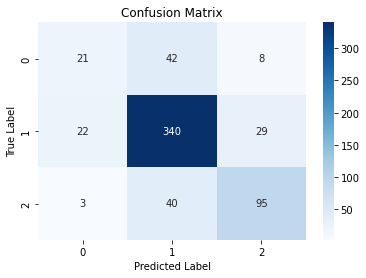

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes object
nb = MultinomialNB()

# Train the model on the training data
nb.fit(X_train, y_train)

# Make predictions on the testing data
nb_preds = nb.predict(X_test)

# Evaluate the model
print('Accuracy Score:', accuracy_score(y_test, nb_preds))
print('Precision Score:', precision_score(y_test, nb_preds, average='weighted'))

# Create a confusion matrix using the predicted and true labels
cm = confusion_matrix(y_test, nb_preds)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Support Vector Machine (SVM)

Accuracy Score: 0.78
Precision Score: 0.7713771842395329


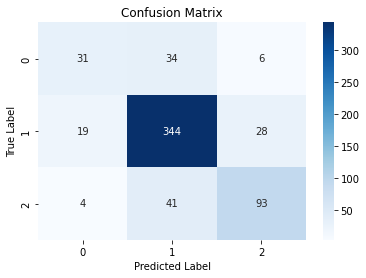

In [39]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM object
svm = LinearSVC()

# Train the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the testing data
svm_preds = svm.predict(X_test)

# Evaluate the model
print('Accuracy Score:', accuracy_score(y_test, svm_preds))
print('Precision Score:', precision_score(y_test, svm_preds, average='weighted'))

# Create a confusion matrix using the predicted and true labels
cm = confusion_matrix(y_test, svm_preds)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

Accuracy Score: 0.7716666666666666
Precision Score: 0.7609927346701539


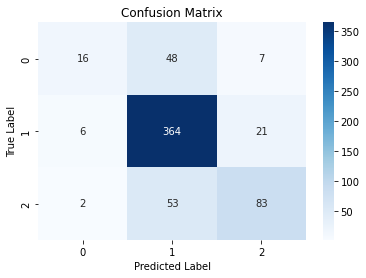

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the classifier on the training set
rf_classifier.fit(X_train, y_train)

# make predictions on the test set
rf_pred = rf_classifier.predict(X_test)

# Evaluate the model
print('Accuracy Score:', accuracy_score(y_test, rf_pred))
print('Precision Score:', precision_score(y_test, rf_pred, average='weighted'))

# Create a confusion matrix using the predicted and true labels
cm = confusion_matrix(y_test, rf_pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Display the result of each model/algorithm

In [41]:
# Create a dictionary to store the results
results = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest'],
    'Accuracy': [0.79, 0.76, 0.78, 0.78],
    'Precision': [0.79, 0.74, 0.77, 0.78]
}
# create a pandas DataFrame from the dictionary
results_df = pd.DataFrame(results)

# set the Model column as the index
results_df.set_index('Model', inplace=True)

# print the DataFrame
print(results_df)

                     Accuracy  Precision
Model                                   
Logistic Regression      0.79       0.79
Naive Bayes              0.76       0.74
SVM                      0.78       0.77
Random Forest            0.78       0.78


# Neural Networks

In [42]:
import keras
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import datetime
from sklearn.metrics import accuracy_score, precision_score


# Define features and label
X = df['cleaned text']
y = df['sentiment']

# Create a LabelEncoder object
le = LabelEncoder()

# create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the text data to create the feature matrix
X = vectorizer.fit_transform(X)

# Fit the encoder to the 'sentiment' column and transform the values to numerical labels
y = le.fit_transform(y)

# Sort the indices of the sparse matrix X
#X.sort_indices()

# Convert the sparse matrix X to array
X = X.toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up a logger
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=5, write_graph=True)

# Train the model on the training set
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[tensorboard_callback])

# Evaluate the model on the testing set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
60/60 [==============================] - 3s 20ms/step - loss: 0.3421 - accuracy: 0.6562 - val_loss: 0.0530 - val_accuracy: 0.6479
Epoch 2/50
60/60 [==============================] - 1s 9ms/step - loss: -0.2777 - accuracy: 0.6583 - val_loss: -0.3530 - val_accuracy: 0.6479
Epoch 3/50
60/60 [==============================] - 0s 7ms/step - loss: -0.8738 - accuracy: 0.6609 - val_loss: -0.7996 - val_accuracy: 0.6500
Epoch 4/50
60/60 [==============================] - 0s 5ms/step - loss: -1.6806 - accuracy: 0.6745 - val_loss: -1.3934 - val_accuracy: 0.6521
Epoch 5/50
60/60 [==============================] - 0s 8ms/step - loss: -2.7858 - accuracy: 0.6875 - val_loss: -2.2300 - val_accuracy: 0.6500
Epoch 6/50
60/60 [==============================] - 1s 10ms/step - loss: -4.2549 - accuracy: 0.6979 - val_loss: -3.2497 - val_accuracy: 0.6521
Epoch 7/50
60/60 [==============================] - 0s 8ms/step - loss: -6.0758 - accuracy: 0.7016 - val_loss: -4.4837 - val_accuracy: 0.6542
Epoch 

In [43]:
# Visualise Neural Networks using Tensorboard

In [44]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

#tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 716), started 1 day, 14:21:23 ago. (Use '!kill 716' to kill it.)